# Tensorflow(keras)를 활용한 손글씨(숫자) 인식​
---

## 1. 프로젝트 선정 이유, 프로젝트 환경

 * 증강현실 등 다양한 혁신기술들이 점차 일상생활에 적용되고 있다. 향후 실생활과 네트워크의 가교 역할을 하는 기술에 대한 수요는 지속적으로 증가할 것으로 예상된다. 여기서 OCR은 가장 기본적이면서도 핵심적인 기술이 될 것이다. 특히 숫자는 온라인과 오프라인 양 측에서 모두 핵심적인 정보전달 수단으로 쓰이고 있다. 전화번호, 우편번호 등 다양한 숫자 정보들이 실생활에서 수기로 쓰여지고 있어 디지털 자료로 전환될 필요 여지가 있다. 이러한 정보들은 기존의 방식으로는 디지털화가 어려웠으나, 인공신경망 기술은 기존에는 처리하기 어려웠던 자료들도 처리할 수 있게 하였다. 따라서 이 프로젝트에서는 인공신경망을 구축하여 수기로 쓰여져 이미지 형태로 저장된 데이터를 컴퓨터가 처리할 수 있는 디지털 형태의 자료로 만드는 것을 목표로 하였다.​

 * 사용 언어
  * Python
  * 리눅스

 * 사용 도구
  * Tensorflow
  * keras

## 2. 사전 준비

In [ ]:
# 관련 도구 라이브러리 불러오기
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AvgPool2D, Flatten,Dense, Dropout,MaxPooling2D
from tensorflow.keras.models import load_model
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

import os

In [ ]:
# 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 데이터 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

## 3. 데이터셋 탐색

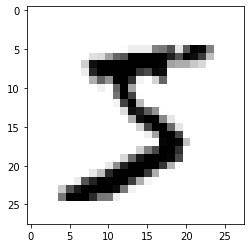

In [ ]:
plt.imshow(train_images[0], cmap=plt.cm.binary)

In [ ]:
class_names = [0,1,2,3,4,5,6,7,8,9]

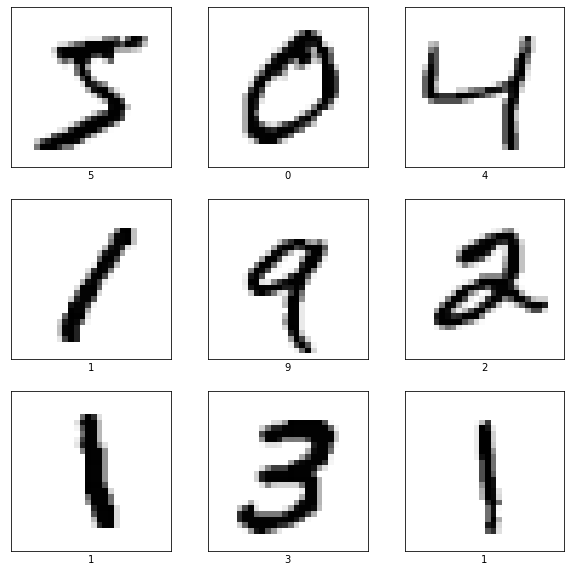

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 4. 베이스라인 모델

In [ ]:
model_base = Sequential([
    Flatten(input_shape=(28, 28,1)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model_base.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_40 (Dense)            (None, 64)                50240     
                                                                 
 dense_41 (Dense)            (None, 64)                4160      
                                                                 
 dense_42 (Dense)            (None, 64)                4160      
                                                                 
 dense_43 (Dense)            (None, 64)                4160      
                                                                 
 dense_44 (Dense)            (None, 64)                4160      
                                                                 
 dense_45 (Dense)            (None, 64)               

  * 총 7층의 깊이를 갖는 인공신경망 구축
  * 이미지를 각각의 픽셀 별로 나눈 뒤 1차원의 형태로 모델에 입력
  * 구분해야 할 숫자는 0~9까지 10가지 이므로 출력층에서는 총 10개 노드가 존재
  * 출력층을 제외한 나머지 층은 모두 64개의 노드로 구성된 단순한 형태의 ANN

In [ ]:
model_base.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model_base.fit(train_images, train_labels, epochs=30,
                     validation_split=0.2, callbacks=[cp_callback])

Epoch 1/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0857 - accuracy: 0.9736 - val_loss: 0.1326 - val_accuracy: 0.9603
Epoch 2/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0771 - accuracy: 0.9767 - val_loss: 0.1213 - val_accuracy: 0.9656
Epoch 3/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0707 - accuracy: 0.9782 - val_loss: 0.1248 - val_accuracy: 0.9655
Epoch 4/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0653 - accuracy: 0.9804 - val_loss: 0.1286 - val_accuracy: 0.9643
Epoch 5/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0590 - accuracy: 0.9826 - val_loss: 0.1384 - val_accuracy: 0.9628
Epoch 6/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0543 - accuracy: 0.9844 - val_loss: 0.1174 - val_accuracy: 0.9682
Epoch 7/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0495 - accuracy: 0.9844 - val_loss: 0.1252 - val_accuracy:

In [ ]:
baseline = Sequential([
    Flatten(input_shape=(28, 28,1), name="flatten_1"),
    Dense(64, activation='relu', name="dense_1"),
    Dense(64, activation='relu',name="dense_2"),
    Dense(64, activation='relu',name="dense_3"),
    Dense(64, activation='relu',name="dense_4"),
    Dense(64, activation='relu',name="dense_5"),
    Dense(64, activation='relu',name="dense_6"),
    Dense(10, activation='softmax',name="dense_7")
],name="baseline")

In [ ]:
 baseline = Sequential([
    Flatten(input_shape=(28, 28,1), name="flatten_1"),
    Dense(64, activation='relu', name="dense_1",kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    Dense(64, activation='relu',name="dense_2",kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    Dense(64, activation='relu',name="dense_3",kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    Dense(64, activation='relu',name="dense_4",kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    Dense(64, activation='relu',name="dense_5",kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    Dense(64, activation='relu',name="dense_6",kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    Dense(10, activation='softmax',name="dense_7",kernel_initializer='glorot_uniform', bias_initializer='zeros')
],name="baseline")
    

In [ ]:
baseline.summary()

Model: "baseline"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                416

In [ ]:
baseline.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = baseline.fit(train_images, train_labels, epochs=30,
                     validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 7s 3ms/step - loss: 1.1566 - accuracy: 0.6166 - val_loss: 0.4011 - val_accuracy: 0.8807
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3386 - accuracy: 0.8982 - val_loss: 0.3023 - val_accuracy: 0.9051
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2434 - accuracy: 0.9271 - val_loss: 0.2123 - val_accuracy: 0.9344
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1946 - accuracy: 0.9420 - val_loss: 0.1757 - val_accuracy: 0.9495
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1642 - accuracy: 0.9511 - val_loss: 0.1536 - val_accuracy: 0.9545
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1405 - accuracy: 0.9573 - val_loss: 0.1445 - val_accuracy: 0.9585
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1236 - accuracy: 0.9633 - val_loss: 0.1541 - val_accuracy:

In [ ]:
history = baseline.fit(train_images, train_labels, epochs=20,validation_data=(test_images,test_labels))

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.8816 - accuracy: 0.7298 - val_loss: 0.3251 - val_accuracy: 0.9029
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2847 - accuracy: 0.9153 - val_loss: 0.2247 - val_accuracy: 0.9330
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2080 - accuracy: 0.9383 - val_loss: 0.1830 - val_accuracy: 0.9454
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1675 - accuracy: 0.9495 - val_loss: 0.1538 - val_accuracy: 0.9540
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1405 - accuracy: 0.9576 - val_loss: 0.1364 - val_accuracy: 0.9606
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1225 - accuracy: 0.9626 - val_loss: 0.1304 - val_accuracy: 0.9597
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1068 - accuracy: 0.9679 - val_loss: 0.1229 - val_accura

In [ ]:
history_dict = history.history

In [ ]:
for i in range(20):
    if (min(history.history['val_loss'])==history.history['val_loss'][i]):
        print(i)

16


In [ ]:
for i in range(20):
    if (max(history.history['val_accuracy'])==history.history['val_accuracy'][i]):
        print(i)

16


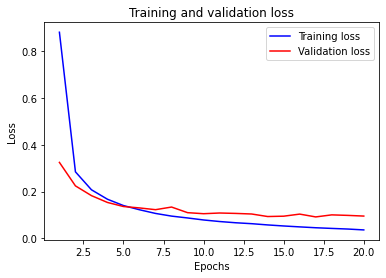

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')

plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

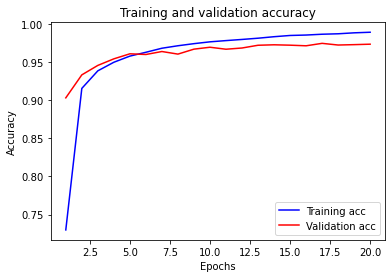

In [ ]:
plt.clf()
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = baseline.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.1169 - accuracy: 0.9724 - 856ms/epoch - 3ms/step


In [ ]:
checkpoint_path = 'C:/Users/user/Desktop/cpkt/cp--{epoch:04d}.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

In [ ]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0,
                                                 save_freq='epoch',
                                                 )  # 5번째 에포크마다 가중치를 저장

In [ ]:
history = baseline.fit(train_images, train_labels, epochs=30,
                     validation_split=0.2, callbacks=[cp_callback])

Epoch 1/30
1500/1500 [==============================] - 9s 6ms/step - loss: 1.3204 - accuracy: 0.5787 - val_loss: 0.5064 - val_accuracy: 0.8536
Epoch 2/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3746 - accuracy: 0.8897 - val_loss: 0.2766 - val_accuracy: 0.9201
Epoch 3/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2573 - accuracy: 0.9241 - val_loss: 0.2252 - val_accuracy: 0.9326
Epoch 4/30
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2023 - accuracy: 0.9409 - val_loss: 0.1880 - val_accuracy: 0.9456
Epoch 5/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1674 - accuracy: 0.9506 - val_loss: 0.1720 - val_accuracy: 0.9482
Epoch 6/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1443 - accuracy: 0.9579 - val_loss: 0.1483 - val_accuracy: 0.9568
Epoch 7/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1274 - accuracy: 0.9617 - val_loss: 0.1546 - val_accuracy:

In [ ]:
history_dict=history.history

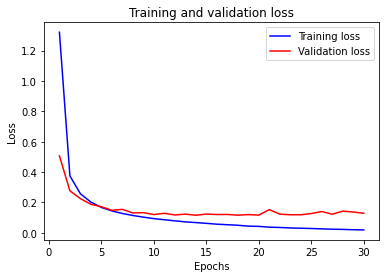

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')

plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

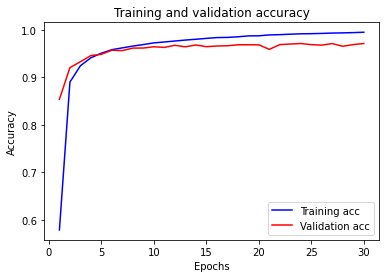

In [ ]:
plt.clf()
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
for i in range(20):
    if (min(history.history['val_loss'])==history.history['val_loss'][i]):
        print(i+1)
for i in range(20):
    if (max(history.history['val_accuracy'])==history.history['val_accuracy'][i]):
        print(i+1)

14


In [ ]:
for i in range(20):
    if (min(history.history['loss'])==history.history['loss'][i]):
        print(i+1)
for i in range(20):
    if (max(history.history['accuracy'])==history.history['accuracy'][i]):
        print(i+1)

In [ ]:
min(history.history['loss'])

0.01927768625319004

In [ ]:
baseline.load_weights('C:/Users/user/Desktop/cpkt/cp--0014.ckpt')

In [ ]:

tf.keras.utils.plot_model(baseline, "C:/Users/user/Desktop/test_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
test_loss, test_acc = baseline.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.1133 - accuracy: 0.9660 - 906ms/epoch - 3ms/step


In [ ]:
test_loss, test_acc = baseline.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.1165 - accuracy: 0.9681 - 885ms/epoch - 3ms/step


## 5. LeNet 모델

In [ ]:
model_lenet5 = Sequential([
    Conv2D(6, (5, 5), activation='tanh', input_shape=(28, 28, 1), padding="same",name="C1"),
    AvgPool2D(2, 2, name="S2"), 
    Conv2D(16, (5, 5), activation='tanh',name="C3"),
    AvgPool2D(2, 2, name="S4"), 
    Conv2D(120, (5, 5), activation='tanh',name="C5"), 
    Flatten(name="Flatten"), 
    Dense(84, activation='tanh',name="F6"), 
    Dense(10, activation='softmax',name="output")
],name="LeNet-5")

In [ ]:
model_lenet5_2 = Sequential([
    Conv2D(16, (5, 5), activation='tanh',input_shape=(28, 28, 1)),
    AvgPool2D(pool_size=(2, 2), strides=2), 
    Conv2D(120, (5, 5), activation='tanh'), 
    Flatten(), 
    Dense(84, activation='tanh'), 
    Dense(10, activation='softmax')
])

In [ ]:
model_lenet5.summary()

Model: "LeNet-5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 C1 (Conv2D)                 (None, 28, 28, 6)         156       
                                                                 
 S2 (AveragePooling2D)       (None, 14, 14, 6)         0         
                                                                 
 C3 (Conv2D)                 (None, 10, 10, 16)        2416      
                                                                 
 S4 (AveragePooling2D)       (None, 5, 5, 16)          0         
                                                                 
 C5 (Conv2D)                 (None, 1, 1, 120)         48120     
                                                                 
 Flatten (Flatten)           (None, 120)               0         
                                                                 
 F6 (Dense)                  (None, 84)                1016

In [ ]:
model_lenet5.compile(optimizer='SGD', loss='MSE', metrics=['accuracy'])

In [ ]:
model_lenet5.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_lenet5.fit(train_images, train_labels, epochs=1)


In [ ]:
history = model_lenet5.fit(train_images, train_labels, epochs=30,validation_data=(test_images,test_labels))

Epoch 1/30
1875/1875 [==============================] - 13s 6ms/step - loss: 0.6450 - accuracy: 0.8335 - val_loss: 0.3010 - val_accuracy: 0.9121
Epoch 2/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2685 - accuracy: 0.9214 - val_loss: 0.2130 - val_accuracy: 0.9363
Epoch 3/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2018 - accuracy: 0.9402 - val_loss: 0.1626 - val_accuracy: 0.9523
Epoch 4/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1589 - accuracy: 0.9523 - val_loss: 0.1309 - val_accuracy: 0.9629
Epoch 5/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1304 - accuracy: 0.9609 - val_loss: 0.1092 - val_accuracy: 0.9673
Epoch 6/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1101 - accuracy: 0.9676 - val_loss: 0.0943 - val_accuracy: 0.9725
Epoch 7/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0954 - accuracy: 0.9716 - val_loss: 0.0832 - val_ac

In [ ]:
model_lenet5.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
checkpoint_path = 'C:/Users/user/Desktop/cpkt/cp--{epoch:04d}.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

In [ ]:
model_lenet5.load_weights(checkpoint_path)

In [ ]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0,
                                                 save_freq='epoch',
                                                 )  # 5번째 에포크마다 가중치를 저장

In [ ]:
history = model_lenet5.fit(train_images, train_labels, epochs=10,
                     validation_split=0.2, callbacks=[cp_callback])

In [ ]:
history_dict = history.history

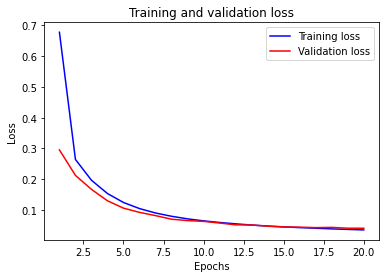

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# bo: 파란색 점
plt.plot(epochs, loss, 'b', label='Training loss')
# b : 파란 실선
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

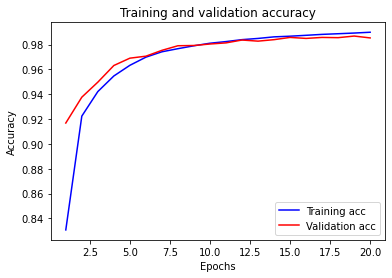

In [ ]:
plt.clf()
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
max(history.history['val_accuracy'])

0.9868000149726868

In [ ]:
min(history.history['val_loss'])

0.04081031680107117

In [ ]:
for i in range(20):
    if (max(history.history['val_accuracy'])==history.history['val_accuracy'][i]):
        print(i+1)

19


In [ ]:
for i in range(20):
    if (min(history.history['val_loss'])==history.history['val_loss'][i]):
        print(i+1)

20


In [ ]:

print(history_dict['accuracy'][i])
print(history_dict['val_accuracy'][i])
print(history_dict['loss'][i])
print(history_dict['val_loss'][i])

In [ ]:
model_lenet5.evaluate(test_images,  test_labels, verbose=2)

## 6. 하이퍼파라미터 최적화

 * 활성화 함수를 tanh에서 relu로 변경

 * 드롭아웃 적용

 * AVGpool -> MAXpool


In [ ]:
model_lenet5_better = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1), padding="same"),
    Dropout(0.2),
    AvgPool2D(2, 2), 
    Conv2D(16, (5, 5), activation='relu'),
    Dropout(0.2),
    AvgPool2D(2, 2), 
    Conv2D(120, (5, 5), activation='relu'), 
    Flatten(), 
    Dense(84, activation='relu'), 
    Dense(10, activation='softmax')
])

In [ ]:
model_lenet5_better = Sequential([
    Conv2D(6, (5, 5), activation='PReLU', input_shape=(28, 28, 1), padding="same"),
    Dropout(0.2),
    AvgPool2D(2, 2), 
    Conv2D(16, (5, 5), activation='PReLU'),
    Dropout(0.2),
    AvgPool2D(2, 2), 
    Conv2D(120, (5, 5), activation='PReLU'), 
    Flatten(), 
    Dense(84, activation='PReLU'), 
    Dense(10, activation='softmax')
])

In [ ]:
model_lenet5_better = Sequential([
    Conv2D(6, (5, 5), activation='ReLU', input_shape=(28, 28, 1), padding="same"),
    Dropout(0.2),
    MaxPooling2D(2, 2), 
    Conv2D(16, (5, 5), activation='ReLU'),
    Dropout(0.2),
    MaxPooling2D(2, 2), 
    Conv2D(120, (5, 5), activation='ReLU'), 
    Flatten(), 
    Dense(84, activation='ReLU'), 
    Dense(10, activation='softmax')
])

 * 최적화 함수를 SGD에서 adam으로 변경

 * 배치사이즈 32->64로 증가

In [ ]:
model_lenet5_better.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
                     metrics=['accuracy'])

In [ ]:
history = model_lenet5_better.fit(train_images, train_labels, epochs=10,
                     validation_split=0.2, callbacks=[cp_callback], batch_size=64)

Epoch 1/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3947 - accuracy: 0.8799 - val_loss: 0.1273 - val_accuracy: 0.9635
Epoch 2/10
750/750 [==============================] - 6s 8ms/step - loss: 0.1181 - accuracy: 0.9638 - val_loss: 0.0883 - val_accuracy: 0.9732
Epoch 3/10
750/750 [==============================] - 5s 7ms/step - loss: 0.0840 - accuracy: 0.9741 - val_loss: 0.0684 - val_accuracy: 0.9801
Epoch 4/10
750/750 [==============================] - 5s 7ms/step - loss: 0.0668 - accuracy: 0.9790 - val_loss: 0.0631 - val_accuracy: 0.9819
Epoch 5/10
750/750 [==============================] - 5s 7ms/step - loss: 0.0567 - accuracy: 0.9825 - val_loss: 0.0513 - val_accuracy: 0.9849
Epoch 6/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0499 - accuracy: 0.9838 - val_loss: 0.0473 - val_accuracy: 0.9857
Epoch 7/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0438 - accuracy: 0.9862 - val_loss: 0.0445 - val_accuracy: 0.9870
Epoch 

In [ ]:
history = model_lenet5_better.fit(train_images, train_labels, epochs=10,
                     validation_split=0.2, callbacks=[cp_callback], batch_size=64)

Epoch 1/10
750/750 [==============================] - 8s 9ms/step - loss: 0.3306 - accuracy: 0.9018 - val_loss: 0.1325 - val_accuracy: 0.9615
Epoch 2/10
750/750 [==============================] - 6s 9ms/step - loss: 0.1090 - accuracy: 0.9662 - val_loss: 0.0801 - val_accuracy: 0.9754
Epoch 3/10
750/750 [==============================] - 7s 9ms/step - loss: 0.0802 - accuracy: 0.9752 - val_loss: 0.0724 - val_accuracy: 0.9777
Epoch 4/10
750/750 [==============================] - 6s 9ms/step - loss: 0.0655 - accuracy: 0.9797 - val_loss: 0.0631 - val_accuracy: 0.9812
Epoch 5/10
750/750 [==============================] - 7s 9ms/step - loss: 0.0551 - accuracy: 0.9822 - val_loss: 0.0564 - val_accuracy: 0.9836
Epoch 6/10
750/750 [==============================] - 7s 9ms/step - loss: 0.0462 - accuracy: 0.9858 - val_loss: 0.0456 - val_accuracy: 0.9867
Epoch 7/10
750/750 [==============================] - 7s 9ms/step - loss: 0.0404 - accuracy: 0.9871 - val_loss: 0.0498 - val_accuracy: 0.9862
Epoch 

In [ ]:
history = model_lenet5_better.fit(train_images, train_labels, epochs=10,
                     validation_split=0.2, callbacks=[cp_callback], batch_size=64)

Epoch 1/10
750/750 [==============================] - 5s 7ms/step - loss: 0.0285 - accuracy: 0.9911 - val_loss: 0.0413 - val_accuracy: 0.9879
Epoch 2/10
750/750 [==============================] - 5s 7ms/step - loss: 0.0263 - accuracy: 0.9914 - val_loss: 0.0386 - val_accuracy: 0.9896
Epoch 3/10
750/750 [==============================] - 5s 7ms/step - loss: 0.0240 - accuracy: 0.9917 - val_loss: 0.0495 - val_accuracy: 0.9862
Epoch 4/10
750/750 [==============================] - 5s 7ms/step - loss: 0.0242 - accuracy: 0.9919 - val_loss: 0.0419 - val_accuracy: 0.9885
Epoch 5/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0212 - accuracy: 0.9928 - val_loss: 0.0460 - val_accuracy: 0.9887
Epoch 6/10
750/750 [==============================] - 5s 7ms/step - loss: 0.0209 - accuracy: 0.9929 - val_loss: 0.0440 - val_accuracy: 0.9886
Epoch 7/10
750/750 [==============================] - 5s 7ms/step - loss: 0.0193 - accuracy: 0.9936 - val_loss: 0.0385 - val_accuracy: 0.9902
Epoch 

In [ ]:
history_dict = history.history

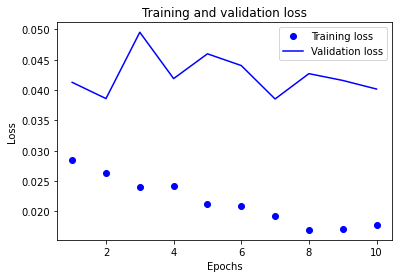

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# bo: 파란색 점
plt.plot(epochs, loss, 'bo', label='Training loss')
# b : 파란 실선
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

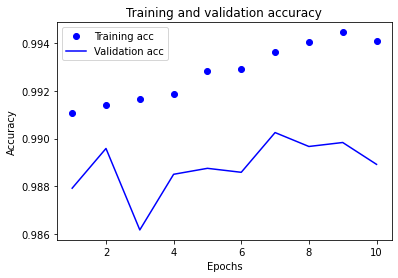

In [ ]:
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
model_lenet5_better.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0414 - accuracy: 0.9897 - 1s/epoch - 3ms/step


[0.041358888149261475, 0.9897000193595886]

In [ ]:
model_lenet5_better2 = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1), padding="same"),
    AvgPool2D(2, 2), 
    Conv2D(16, (5, 5), activation='relu'),
    AvgPool2D(2, 2), 
    Conv2D(120, (5, 5), activation='relu'), 
    Flatten(), 
    Dense(84, activation='relu'), 
    Dense(10, activation='softmax')
])

 * 앙상블 모델(평균) 적용


In [ ]:
model_base = Sequential([
    Flatten(input_shape=(28, 28,1)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model_lenet5 = Sequential([
    Conv2D(6, (5, 5), activation='tanh', input_shape=(28, 28, 1), padding="same"),
    AvgPool2D(2, 2), 
    Conv2D(16, (5, 5), activation='tanh'),
    AvgPool2D(2, 2), 
    Conv2D(120, (5, 5), activation='tanh'), 
    Flatten(), 
    Dense(84, activation='tanh'), 
    Dense(10, activation='softmax')
])

In [ ]:
x1=model_base.output

In [ ]:
x2=model_lenet5.output

In [ ]:
net=tf.keras.layers.Average()([x1,x2])

In [ ]:
output=Dense(10, activation='softmax')(net)

In [ ]:
inputs = tf.keras.layers.Input(shape=(28,28,1))

In [ ]:
model_ensemble=tf.keras.models.Model([model_base.input,model_lenet5.input],net)

In [ ]:
model_ensemble.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_ensemble.fit([train_images,train_images], train_labels, epochs=5,validation_split=0.2,)

Epoch 1/5
1500/1500 [==============================] - 20s 6ms/step - loss: 0.3176 - accuracy: 0.9035 - val_loss: 0.1478 - val_accuracy: 0.9564
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1261 - accuracy: 0.9581 - val_loss: 0.1148 - val_accuracy: 0.9606
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0902 - accuracy: 0.9674 - val_loss: 0.1339 - val_accuracy: 0.9408
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0761 - accuracy: 0.9693 - val_loss: 0.0942 - val_accuracy: 0.9663
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0626 - accuracy: 0.9722 - val_loss: 0.1012 - val_accuracy: 0.9592


In [ ]:
model_lenet5_better = Sequential([
    Conv2D(6, (5, 5), input_shape=(28, 28, 1), padding="same"),
    layers.BatchNormalization(),
    layers.Activation(activation='relu'),
    Dropout(0.2),
    AvgPool2D(2, 2), 
    Conv2D(16, (5, 5)),
    layers.BatchNormalization(),
    layers.Activation(activation='relu'),
    Dropout(0.2),
    AvgPool2D(2, 2), 
    Conv2D(120, (5, 5)), 
    layers.BatchNormalization(),
    layers.Activation(activation='relu'),
    Flatten(), 
    Dense(84, activation='relu'), 
    Dense(10, activation='softmax')
])

In [ ]:
model_lenet5_better.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
                     metrics=['accuracy'])

In [ ]:
model_lenet5_better.fit(train_images, train_labels, epochs=10,
                     validation_split=0.2, batch_size=64)

In [ ]:
model_lenet5_better.fit(train_images, train_labels, epochs=10,
                     validation_split=0.2, batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 18s 4ms/step - loss: 0.1589 - accuracy: 0.9519 - val_loss: 0.0501 - val_accuracy: 0.9843
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0754 - accuracy: 0.9761 - val_loss: 0.0491 - val_accuracy: 0.9840
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0604 - accuracy: 0.9811 - val_loss: 0.0474 - val_accuracy: 0.9848
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0503 - accuracy: 0.9839 - val_loss: 0.0489 - val_accuracy: 0.9846
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0468 - accuracy: 0.9848 - val_loss: 0.0384 - val_accuracy: 0.9884
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0395 - accuracy: 0.9874 - val_loss: 0.0325 - val_accuracy: 0.9899
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0347 - accuracy: 0.9885 - val_loss: 0.0322 - val_accuracy

In [ ]:
model_lenet5_better.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', 
                     metrics=['accuracy'])

In [ ]:
model_lenet5_better.fit(train_images, train_labels, epochs=10,
                     validation_split=0.2, batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2913 - accuracy: 0.9240 - val_loss: 0.0811 - val_accuracy: 0.9778
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1095 - accuracy: 0.9682 - val_loss: 0.0608 - val_accuracy: 0.9818
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0826 - accuracy: 0.9750 - val_loss: 0.0494 - val_accuracy: 0.9853
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0710 - accuracy: 0.9781 - val_loss: 0.0420 - val_accuracy: 0.9870
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0598 - accuracy: 0.9812 - val_loss: 0.0401 - val_accuracy: 0.9878
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0542 - accuracy: 0.9841 - val_loss: 0.0355 - val_accuracy: 0.9890
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0515 - accuracy: 0.9841 - val_loss: 0.0377 - val_accuracy:

In [ ]:
model_lenet5_better = Sequential([
    Conv2D(6, (5, 5), input_shape=(28, 28, 1), padding="same"),
    layers.BatchNormalization(),
    layers.Activation(activation='relu'),
    Dropout(0.2),
    layers.MaxPool2D(2, 2), 
    Conv2D(16, (5, 5)),
    layers.BatchNormalization(),
    layers.Activation(activation='relu'),
    Dropout(0.2),
    layers.MaxPool2D(2, 2), 
    Conv2D(120, (5, 5)), 
    layers.BatchNormalization(),
    layers.Activation(activation='relu'),
    Flatten(), 
    Dense(84, activation='relu'), 
    Dense(10, activation='softmax')
])

In [ ]:
model_lenet5_better.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
                     metrics=['accuracy'])

In [ ]:
model_lenet5_better.fit(train_images, train_labels, epochs=10,
                     validation_split=0.2, batch_size=64)

Epoch 1/10
750/750 [==============================] - 5s 5ms/step - loss: 0.0138 - accuracy: 0.9954 - val_loss: 0.0813 - val_accuracy: 0.9768
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0131 - accuracy: 0.9957 - val_loss: 0.0844 - val_accuracy: 0.9758
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0126 - accuracy: 0.9957 - val_loss: 0.0769 - val_accuracy: 0.9776
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0107 - accuracy: 0.9967 - val_loss: 0.0762 - val_accuracy: 0.9790
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0140 - accuracy: 0.9952 - val_loss: 0.0783 - val_accuracy: 0.9782
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0116 - accuracy: 0.9959 - val_loss: 0.0597 - val_accuracy: 0.9827
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0117 - accuracy: 0.9958 - val_loss: 0.0710 - val_accuracy: 0.9802
Epoch 